In [10]:
#mrdragonbear tutorial
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

%matplotlib inline

import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses
from sklearn.utils import shuffle



In [11]:
# define Beale's function which we want to minimize
def objective(X):
    x = X[0]; y = X[1]
    return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

In [12]:
# function boundaries
xmin, xmax, xstep = -4.5, 4.5, .9
ymin, ymax, ystep = -4.5, 4.5, .9

In [13]:
# Let's create some points
x1, y1 = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))


In [14]:
# initial guess
x0 = [4., 4.]  
f0 = objective(x0)
print (f0)

68891.203125


In [15]:
bnds = ((xmin, xmax), (ymin, ymax))
minimum = minimize(objective, x0, bounds=bnds)

In [16]:
print(minimum)


      fun: 2.068032093839601e-12
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.55968975e-06,  9.89836269e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 60
      nit: 14
     njev: 20
   status: 0
  success: True
        x: array([3.00000257, 0.50000085])


In [17]:
real_min = [3.0, 0.5]
print (f'The answer, {minimum.x}, is very close to the optimum as we know it, which is {real_min}') 
print (f'The value of the objective for {real_min} is {objective(real_min)}')

The answer, [3.00000257 0.50000085], is very close to the optimum as we know it, which is [3.0, 0.5]
The value of the objective for [3.0, 0.5] is 0.0


In [18]:
# fix random seed for reproducibility
np.random.seed(5)

In [19]:
mnist = keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

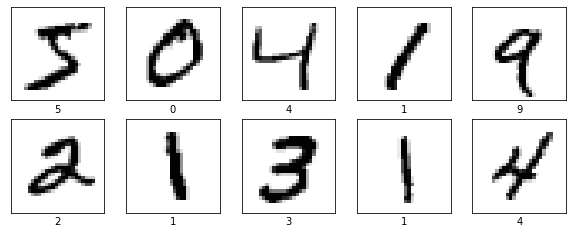

In [20]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

In [21]:
print(f'We have {x_train.shape[0]} train samples')
print(f'We have {x_test.shape[0]} test samples')

We have 60000 train samples
We have 10000 test samples


In [22]:
# normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# reshape the data into 1D vectors
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

num_classes = 10

# Check the column length
x_train.shape[1]

784

In [23]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [24]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [25]:
epochs=60
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [26]:
# build the model
input_dim = x_train.shape[1]

lr_model = Sequential()
lr_model.add(Dense(64, activation=tf.nn.relu, kernel_initializer='uniform', input_dim = input_dim)) 
lr_model.add(Dropout(0.1))
lr_model.add(Dense(64, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(num_classes, kernel_initializer='uniform', activation=tf.nn.softmax))

# compile the model
lr_model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['acc'])

In [27]:
%%time
# Fit the model
batch_size = int(input_dim/100)

lr_model_history = lr_model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 6s 101us/step - loss: 0.3215 - acc: 0.9022 - val_loss: 0.1528 - val_acc: 0.9506
Epoch 2/60
60000/60000 [==============================] - 6s 99us/step - loss: 0.1625 - acc: 0.9501 - val_loss: 0.1288 - val_acc: 0.9599
Epoch 3/60
60000/60000 [==============================] - 6s 98us/step - loss: 0.1390 - acc: 0.9575 - val_loss: 0.1178 - val_acc: 0.9640
Epoch 4/60
60000/60000 [==============================] - 6s 99us/step - loss: 0.1275 - acc: 0.9607 - val_loss: 0.1188 - val_acc: 0.9642
Epoch 5/60
60000/60000 [==============================] - 6s 100us/step - loss: 0.1211 - acc: 0.9628 - val_loss: 0.1148 - val_acc: 0.9649
Epoch 6/60
60000/60000 [==============================] - 7s 109us/step - loss: 0.1131 - acc: 0.9650 - val_loss: 0.1099 - val_acc: 0.9666
Epoch 7/60
60000/60000 [==============================] - 6s 102us/step - loss: 0.1123 - acc: 0.9655 - val_loss: 0.1096 - val

Epoch 60/60
60000/60000 [==============================] - 6s 98us/step - loss: 0.0789 - acc: 0.9752 - val_loss: 0.0976 - val_acc: 0.9721
Wall time: 6min


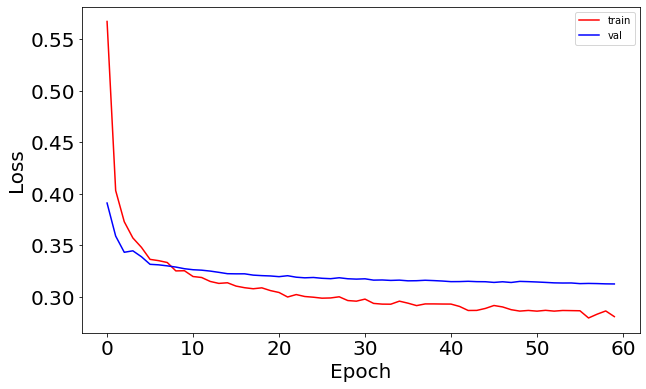

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

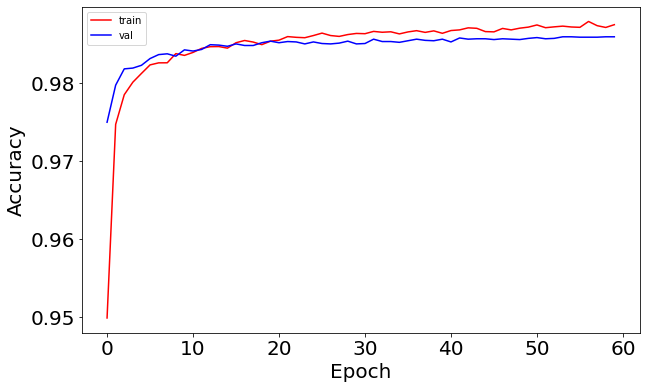

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['acc']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_acc']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [30]:
# solution
epochs = 60
learning_rate = 0.1 # initial learning rate
decay_rate = 0.1
momentum = 0.8

# define the optimizer function
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [31]:
input_dim = x_train.shape[1]
num_classes = 10
batch_size = 196

# build the model
exponential_decay_model = Sequential()
exponential_decay_model.add(Dense(64, activation=tf.nn.relu, kernel_initializer='uniform', input_dim = input_dim))
exponential_decay_model.add(Dropout(0.1))
exponential_decay_model.add(Dense(64, kernel_initializer='uniform', activation=tf.nn.relu))
exponential_decay_model.add(Dense(num_classes, kernel_initializer='uniform', activation=tf.nn.softmax))

# compile the model
exponential_decay_model.compile(loss='categorical_crossentropy', 
                                optimizer=sgd, 
                                metrics=['acc'])

In [32]:
# define the learning rate change 
def exp_decay(epoch):
    lrate = learning_rate * np.exp(-decay_rate*epoch)
    return lrate

In [33]:
# learning schedule callback
loss_history = History()
lr_rate = LearningRateScheduler(exp_decay)
callbacks_list = [loss_history, lr_rate]

# you invoke the LearningRateScheduler during the .fit() phase
exponential_decay_model_history = exponential_decay_model.fit(x_train, y_train,
                                    batch_size=batch_size,
                                    epochs=epochs,
                                    callbacks=callbacks_list,
                                    verbose=1,
                                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 1s 13us/step - loss: 1.9817 - acc: 0.3903 - val_loss: 1.4723 - val_acc: 0.5882
Epoch 2/60
60000/60000 [==============================] - 1s 12us/step - loss: 1.2260 - acc: 0.6407 - val_loss: 1.0023 - val_acc: 0.7197
Epoch 3/60
60000/60000 [==============================] - 1s 12us/step - loss: 0.9682 - acc: 0.7170 - val_loss: 0.8503 - val_acc: 0.7640
Epoch 4/60
60000/60000 [==============================] - 1s 12us/step - loss: 0.8625 - acc: 0.7473 - val_loss: 0.7729 - val_acc: 0.7881
Epoch 5/60
60000/60000 [==============================] - 1s 12us/step - loss: 0.8043 - acc: 0.7626 - val_loss: 0.7266 - val_acc: 0.7987
Epoch 6/60
60000/60000 [==============================] - 1s 12us/step - loss: 0.7686 - acc: 0.7693 - val_loss: 0.6968 - val_acc: 0.8046
Epoch 7/60
60000/60000 [==============================] - 1s 12us/step - loss: 0.7468 - acc: 0.7757 - val_loss: 0.6766 - val_acc

60000/60000 [==============================] - 1s 12us/step - loss: 0.6664 - acc: 0.7977 - val_loss: 0.6037 - val_acc: 0.8261
